Notebook for generating the samples for the GNN model.
For each dataset, the final output is the Dataset.dat file needed by the GNN model.

In [1]:
from functions import get_tuples, export_tuples, geometry_to_graph_analysis
from paths import paths
from constants import VORONOI_TOLERANCE, CORDERO, FG_RAW_GROUPS, CORDERO_ORIGINAL

# Create graph representations

Here we are performing the conversion of the molecule/adsorption geometries into a graph data structure. The final graphs are stored in a text format that contains all the information needed to generate the graph objects in a suitbale Pytorch geometric format. The conversion to PyG suitable format is performed within the HetGraphDataset class.

In [2]:
bad_samples = 0
tot_samples = 0
print("VORONOI TOLERANCE = {} Angstrom".format(VORONOI_TOLERANCE))
for dataset in FG_RAW_GROUPS:
    my_tuple = get_tuples(dataset, VORONOI_TOLERANCE, CORDERO)
    export_tuples(paths[dataset]['dataset'], my_tuple)
    x = geometry_to_graph_analysis(dataset)
    if dataset[:3] != "gas":
        bad_samples += x[0]
        tot_samples += x[2]
print("Voronoi tolerance: {} Angstrom".format(VORONOI_TOLERANCE))
print("Bad samples: {}".format(bad_samples))
print("Total samples: {}".format(tot_samples))
print("Percentage of bad samples: {:.2f}%".format(bad_samples * 100/tot_samples))

VORONOI TOLERANCE = 0.25 Angstrom
Dataset Name: amides
Dataset Size: 180
Number of badly represented data: 5
Percentage of bad representations: 2.78%
-------------------------------------------
Dataset Name: amidines
Dataset Size: 468
Number of badly represented data: 2
Percentage of bad representations: 0.43%
-------------------------------------------
Dataset Name: group2
Dataset Size: 326
Number of badly represented data: 106
Percentage of bad representations: 32.52%
-------------------------------------------
Dataset Name: group2b
Dataset Size: 60
Number of badly represented data: 18
Percentage of bad representations: 30.00%
-------------------------------------------
Dataset Name: group3S
Dataset Size: 228
Number of badly represented data: 1
Percentage of bad representations: 0.44%
-------------------------------------------
Dataset Name: group3N
Dataset Size: 384
Number of badly represented data: 0
Percentage of bad representations: 0.00%
-----------------------------------------

## Sensitivity analysis of the bad representations wrt Voronoi tolerance parameter

In [5]:
voronoi_array = [0, 0.25, 0.5, 0.75, 1.0]
bad_representations_array = []
tot_representations_array = []
for i in range(len(voronoi_array)):
    bad_samples = 0
    tot_samples = 0
    V = voronoi_array[i]
    for dataset in FG_RAW_GROUPS:
        my_tuple = get_tuples(dataset, V, CORDERO_ORIGINAL)
        export_tuples(paths[dataset]['dataset'], my_tuple)
        x = geometry_to_graph_analysis(dataset)
        if dataset[:3] != "gas":
            bad_samples += x[0]
            tot_samples += x[2]
    bad_representations_array.append(bad_samples)
    tot_representations_array.append(tot_samples)
    

Dataset Name: amides
Dataset Size: 180
Number of badly represented data: 172
Percentage of bad representations: 95.56%
-------------------------------------------
Dataset Name: amidines
Dataset Size: 468
Number of badly represented data: 266
Percentage of bad representations: 56.84%
-------------------------------------------
Dataset Name: group2
Dataset Size: 326
Number of badly represented data: 266
Percentage of bad representations: 81.60%
-------------------------------------------
Dataset Name: group2b
Dataset Size: 60
Number of badly represented data: 56
Percentage of bad representations: 93.33%
-------------------------------------------
Dataset Name: group3S
Dataset Size: 228
Number of badly represented data: 76
Percentage of bad representations: 33.33%
-------------------------------------------
Dataset Name: group3N
Dataset Size: 384
Number of badly represented data: 279
Percentage of bad representations: 72.66%
-------------------------------------------
Dataset Name: group4

In [13]:
print(bad_representations_array)
print(tot_representations_array)


[1882, 1413, 1057, 805, 650, 541, 465, 397, 341, 289, 233]
[2642, 2642, 2642, 2642, 2642, 2642, 2642, 2642, 2642, 2642, 2642]


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Missing M-A connections')

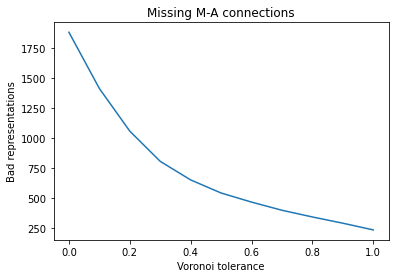

In [14]:
plt.plot(voronoi_array, bad_representations_array)
plt.xlabel("Voronoi tolerance")
plt.ylabel("Bad representations")
plt.title("Missing M-A connections")